In [1]:
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

np.random.seed(0)

sigma = 3

xlim = -5,5
ylim = -5,5

/usr/local/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Fitting a function: $y = f(x) + \epsilon$

Linear model: $f(x) = ax + b$

How do we simulate from a linear model? Define distributions for 
$p(a), p(b), p(\epsilon)$



(-5, 5)

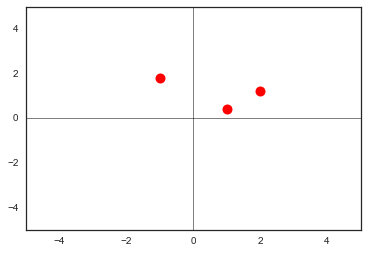

In [2]:
x = np.array([-1., 1, 2])
y = np.array([1.8, 0.4, 1.2])

plt.plot([0,0],ylim, 'k-', linewidth=0.5)
plt.plot(xlim,[0,0], 'k-', linewidth=0.5)
plt.plot(x, y, 'r.', markersize=20)
plt.ylim(ylim)
plt.xlim(xlim)

In [3]:
def make_design_matrix(x, degree=1):
    X = np.ones((x.shape[0],1+degree))
    for i in xrange(1,1+degree):
        X[:,i] = x**i
    return X

In [4]:
def bayesian_linear_regression(x, y, degree=1, beta=10.):
    Phi = make_design_matrix(x, degree)
    D = Phi.shape[1]
    S_N = np.linalg.inv(np.eye(D)/(sigma*sigma) + beta*np.dot(Phi.T, Phi))
    m_N = np.dot(S_N, beta*np.dot(Phi.T, y))
    return m_N, S_N

In [5]:
domain = np.linspace(xlim[0], xlim[1], num=100)

## Completely random linear functions

(-5, 5)

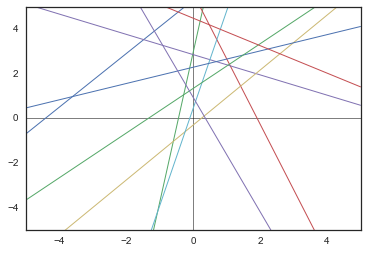

In [6]:
plt.plot([0,0],ylim, 'k-', linewidth=0.5)
plt.plot(xlim,[0,0], 'k-', linewidth=0.5)
for i in xrange(10):
    plt.plot(domain, np.dot(make_design_matrix(domain), np.random.multivariate_normal(np.zeros(2), sigma*sigma*np.identity(2))), linewidth=1)
# plt.plot(x, y, 'r.', markersize=20)
plt.ylim(ylim)
plt.xlim(xlim)

## Linear functions which match the data

(-5, 5)

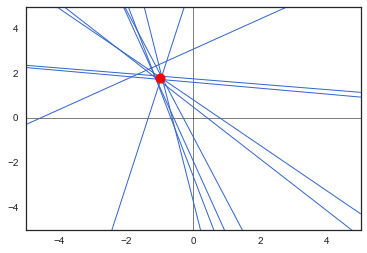

In [7]:
m_N, S_N = bayesian_linear_regression(x[:1], y[:1], 1)

plt.plot([0,0],ylim, 'k-', linewidth=0.5)
plt.plot(xlim,[0,0], 'k-', linewidth=0.5)
for i in xrange(10):
    plt.plot(domain, np.dot(make_design_matrix(domain), np.random.multivariate_normal(m_N, S_N)), color='#3366CC', linewidth=1)
plt.plot(x[:1], y[:1], 'r.', markersize=20)
plt.ylim(ylim)
plt.xlim(xlim)

(-5, 5)

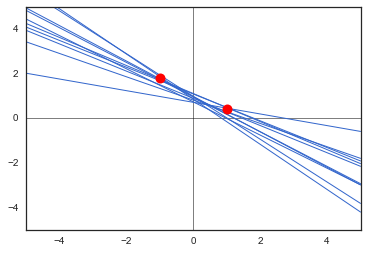

In [8]:
m_N, S_N = bayesian_linear_regression(x[:2], y[:2], 1)

plt.plot([0,0],ylim, 'k-', linewidth=0.5)
plt.plot(xlim,[0,0], 'k-', linewidth=0.5)
for i in xrange(10):
    plt.plot(domain, np.dot(make_design_matrix(domain), np.random.multivariate_normal(m_N, S_N)), color='#3366CC', linewidth=1)
plt.plot(x[:2], y[:2], 'r.', markersize=20)
plt.ylim(ylim)
plt.xlim(xlim)

(-5, 5)

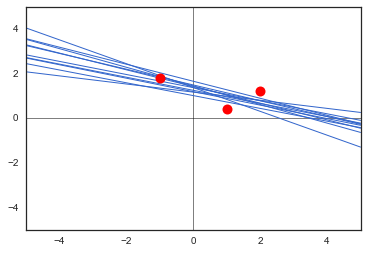

In [9]:
m_N, S_N = bayesian_linear_regression(x, y, 1)

plt.plot([0,0],ylim, 'k-', linewidth=0.5)
plt.plot(xlim,[0,0], 'k-', linewidth=0.5)
for i in xrange(10):
    plt.plot(domain, np.dot(make_design_matrix(domain), np.random.multivariate_normal(m_N, S_N)), color='#3366CC', linewidth=1)
plt.plot(x, y, 'r.', markersize=20)
plt.ylim(ylim)
plt.xlim(xlim)

## Add more data

In [10]:
x_bigger = np.array([-1., 1, 2, 4, -2])
y_bigger = np.array([1.8, 0.4, 1.2, -1.1, 2.2])

m_N, S_N = bayesian_linear_regression(x_bigger, y_bigger, 1)

(-5, 5)

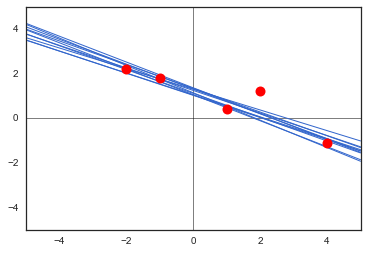

In [11]:
np.random.seed(1)
plt.plot([0,0],ylim, 'k-', linewidth=0.5)
plt.plot(xlim,[0,0], 'k-', linewidth=0.5)
for i in xrange(10):
    plt.plot(domain, np.dot(make_design_matrix(domain), np.random.multivariate_normal(m_N, S_N)), color='#3366CC', linewidth=1)
plt.plot(x_bigger, y_bigger, 'r.', markersize=20)
plt.ylim(ylim)
plt.xlim(xlim)

## Generative models let you sample synthetic data

(-5, 5)

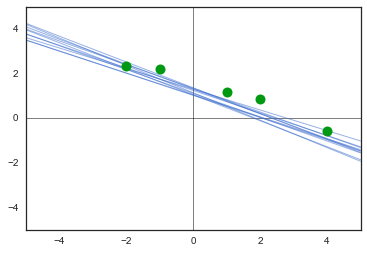

In [12]:
np.random.seed(1)
plt.plot([0,0],ylim, 'k-', linewidth=0.5)
plt.plot(xlim,[0,0], 'k-', linewidth=0.5)
for i in xrange(10):
    plt.plot(domain, np.dot(make_design_matrix(domain), np.random.multivariate_normal(m_N, S_N)), color='#3366CC', linewidth=1, alpha=0.5)
plt.plot(x_bigger, 
         np.dot(make_design_matrix(x_bigger), np.random.multivariate_normal(m_N, S_N)) + np.random.randn(x_bigger.shape[0])/np.sqrt(10.0), 
         '.', color='#009911', markersize=20)
plt.ylim(ylim)
plt.xlim(xlim)

(-5, 5)

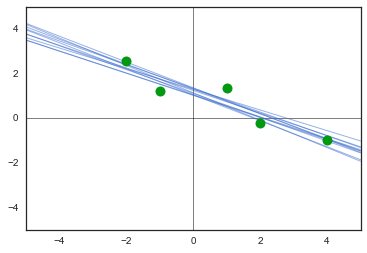

In [13]:
np.random.seed(1)
plt.plot([0,0],ylim, 'k-', linewidth=0.5)
plt.plot(xlim,[0,0], 'k-', linewidth=0.5)
for i in xrange(10):
    plt.plot(domain, np.dot(make_design_matrix(domain), np.random.multivariate_normal(m_N, S_N)), color='#3366CC', linewidth=1, alpha=0.5)
np.random.seed(2)
plt.plot(x_bigger, 
         np.dot(make_design_matrix(x_bigger), np.random.multivariate_normal(m_N, S_N)) + np.random.randn(x_bigger.shape[0])/np.sqrt(10.0), 
         '.', color='#009911', markersize=20)
plt.ylim(ylim)
plt.xlim(xlim)

(-5, 5)

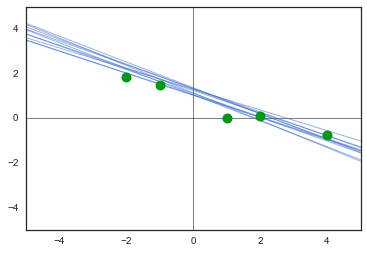

In [14]:
np.random.seed(1)
plt.plot([0,0],ylim, 'k-', linewidth=0.5)
plt.plot(xlim,[0,0], 'k-', linewidth=0.5)
for i in xrange(10):
    plt.plot(domain, np.dot(make_design_matrix(domain), np.random.multivariate_normal(m_N, S_N)), color='#3366CC', linewidth=1, alpha=0.5)
np.random.seed(3)
plt.plot(x_bigger, 
         np.dot(make_design_matrix(x_bigger), np.random.multivariate_normal(m_N, S_N)) + np.random.randn(x_bigger.shape[0])/np.sqrt(10.0), 
         '.', color='#009911', markersize=20)
plt.ylim(ylim)
plt.xlim(xlim)

## More complicated functions: polynomial functions of random degree

In [15]:
def plot_random(domain):
    degree = np.random.geometric(0.5)
    Phi = make_design_matrix(domain, degree)
    #print degree
    D = Phi.shape[1]
    plt.plot(domain, np.dot(Phi, np.random.multivariate_normal(np.zeros(D), sigma*sigma*np.identity(D))), linewidth=1)

(-5, 5)

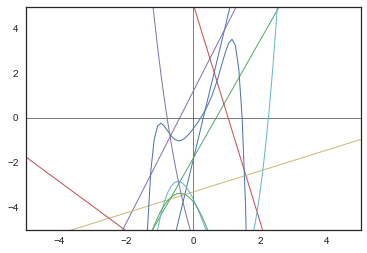

In [16]:
plt.plot([0,0],ylim, 'k-', linewidth=0.5)
plt.plot(xlim,[0,0], 'k-', linewidth=0.5)
for i in xrange(10):
    plot_random(domain)
# plt.plot(x, y, 'r.', markersize=20)
plt.ylim(ylim)
plt.xlim(xlim)

In [17]:
from scipy import stats

In [18]:
def plot_random_fit_polynomial(domain, x, y, ns=100):
    log_weight = np.empty((ns,))
    theta = []
    Phi = []
    for i in xrange(ns):
        # model: p(d)p(theta|d)p(y|theta)
        # proposal: q(d,theta) = p(d)p(theta|d,y)
        #
        # importance weight:
        # w(d,theta) = p(d,theta,y)/q(d,theta) 
        #            = p(theta|d)p(y|theta) / p(theta|d,y)
        degree = np.random.geometric(0.5)
        m_N, S_N = bayesian_linear_regression(x, y, degree)
        Phi.append(make_design_matrix(domain, degree))
        theta.append(np.random.multivariate_normal(m_N, S_N))
        p1 = stats.multivariate_normal(np.zeros(degree+1), sigma**2*np.identity(degree+1)).logpdf(theta[-1]).sum()
        p2 = stats.multivariate_normal(np.dot(make_design_matrix(x, degree), theta[-1]), 0.1*np.identity(x.shape[0])).logpdf(y)
        try:
            q = stats.multivariate_normal(m_N, S_N).logpdf(theta[-1])
        except:
            q = stats.multivariate_normal(m_N, S_N + 0.01*np.identity(degree+1)).logpdf(theta[-1])
        log_weight[i] = p1 + p2 - q
        
    
    log_weight -= np.log(np.exp(log_weight).sum())
    ix = np.random.choice(np.arange(ns), p=np.exp(log_weight))
    
    plt.plot(domain, np.dot(Phi[ix], theta[ix]), color='#3366CC', linewidth=1)

(-5, 5)

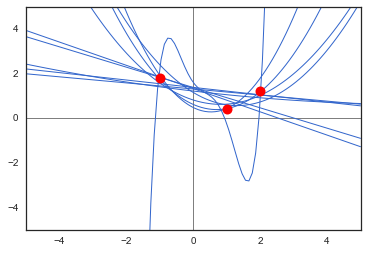

In [19]:
plt.plot([0,0],ylim, 'k-', linewidth=0.5)
plt.plot(xlim,[0,0], 'k-', linewidth=0.5)
for i in xrange(10):
    plot_random_fit_polynomial(domain, x, y)
plt.plot(x, y, 'r.', markersize=20)
plt.ylim(ylim)
plt.xlim(xlim)

(-5, 5)

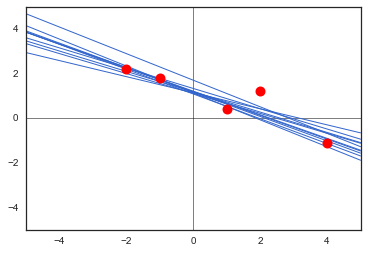

In [20]:
plt.plot([0,0],ylim, 'k-', linewidth=0.5)
plt.plot(xlim,[0,0], 'k-', linewidth=0.5)
for i in xrange(10):
    plot_random_fit_polynomial(domain, x_bigger, y_bigger)
plt.plot(x_bigger, y_bigger, 'r.', markersize=20)
plt.ylim(ylim)
plt.xlim(xlim)

## On less-linear data

(-5, 5)

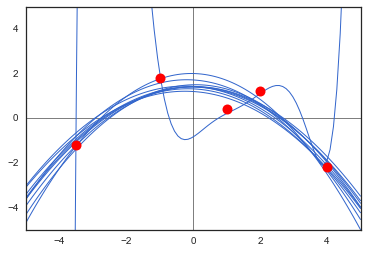

In [21]:
x_other = np.array([-1., 1, 2, 4, -3.5])
y_other = np.array([1.8, 0.4, 1.2, -2.2, -1.2])

np.random.seed(2)
plt.plot([0,0],ylim, 'k-', linewidth=0.5)
plt.plot(xlim,[0,0], 'k-', linewidth=0.5)
for i in xrange(10):
    plot_random_fit_polynomial(domain, x_other, y_other)
plt.plot(x_other, y_other, 'r.', markersize=20)
plt.ylim(ylim)
plt.xlim(xlim)